Importing the libraries and modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Importing the dataset for analysis and mode training


In [4]:
df1 = pd.read_csv("exercise.csv")
df2 = pd.read_csv("calories.csv")

Checking with the dataset


We all the amount of the calories burnt depends on the nature of the exercise. and we have not defined the nautre of exerise here, hence we are supplied with the factors like HEART RATE & BODY TEMP. as it varies for different nature of the exercise like if a person is walking or cycling normally the haeat rate and body temp both will be on a lower side but if a person is plying badminton or running lap or doing gym the heart rate and body temp both will be on a higher side

In [5]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Taking the Union of the 2 dataframe

In [7]:
df = pd.concat([df1, df2["Calories"]], axis=1)

In [8]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [10]:
df.shape

(15000, 9)

Checking for Data Types and Missing Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Visualization and Analysis

In [12]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


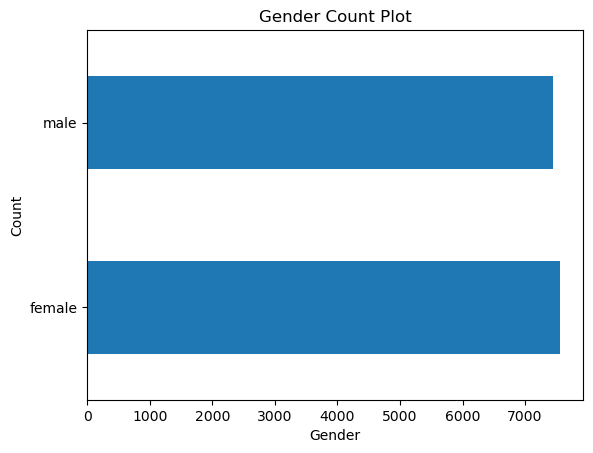

In [13]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind="barh")


plt.title('Gender Count Plot')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show plot
plt.show()


In [14]:
type(gender_counts)

pandas.core.series.Series

<Axes: >

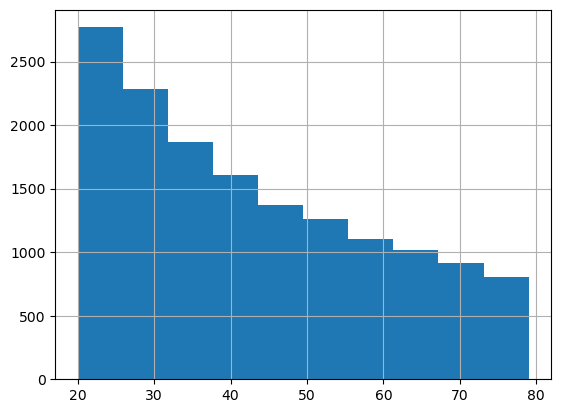

In [15]:
df['Age'].hist()

<Axes: ylabel='Density'>

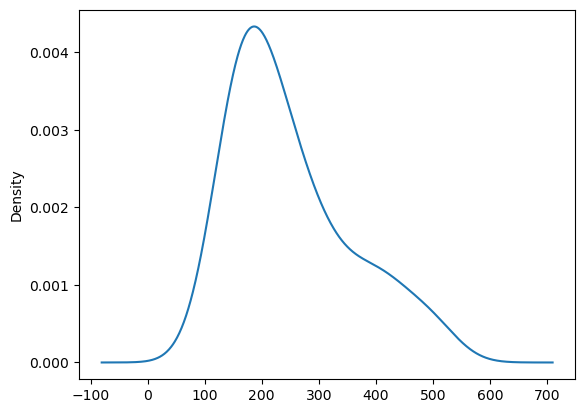

In [16]:
ages = df['Age'].value_counts()
ages.plot(kind= 'density')

More people of near age 20 are present

<Axes: >

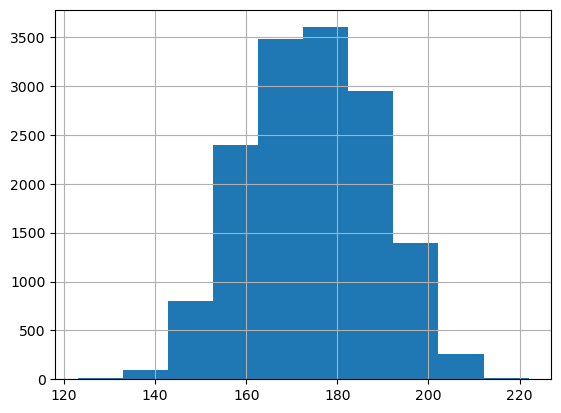

In [17]:
df['Height'].hist()

More people have height between 160cm - 180cm

<Axes: >

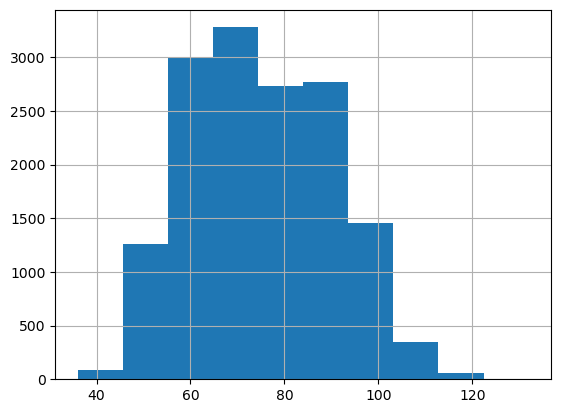

In [18]:
df['Weight'].hist()

More people have weight between 60kg - 70kg

<Axes: >

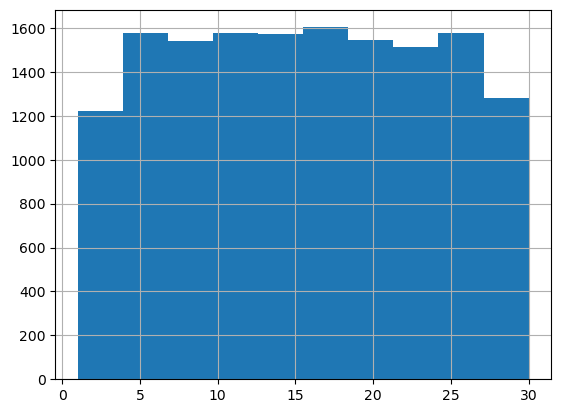

In [19]:
df['Duration'].hist()

Duration distribution looks equally likely for all timestamps

<Axes: >

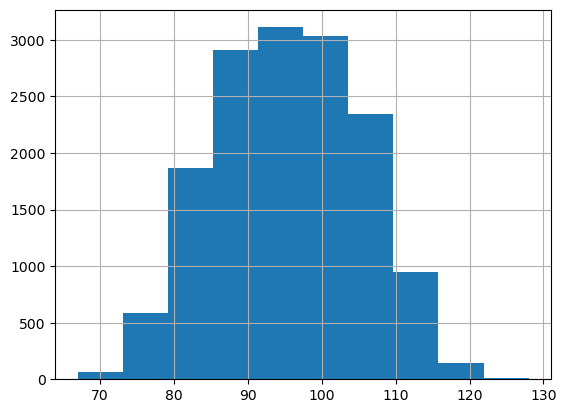

In [20]:
df['Heart_Rate'].hist()

Most people have heart rate aroun 95

<Axes: >

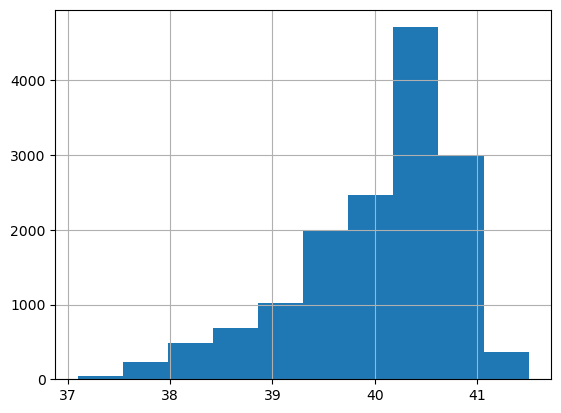

In [21]:
df['Body_Temp'].hist()

The most common body temp is around 40.2

Checking with the correlation between different features of the dataset

In [22]:
df_corre = df.drop("Gender", axis=1)
df_corre

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,15644082,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,78,193.0,97.0,2.0,84.0,38.3,11.0


In [23]:
corr = df_corre.corr()
corr

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

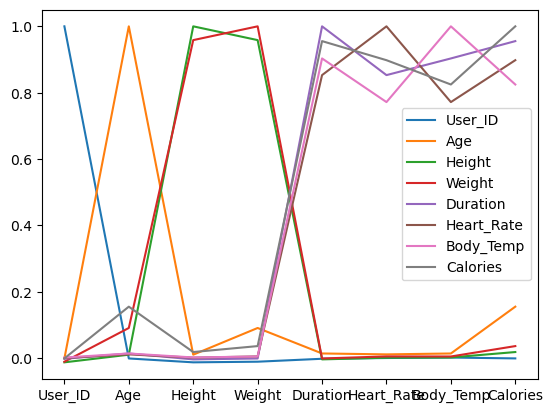

In [24]:
corr.plot()

Not looking so clear

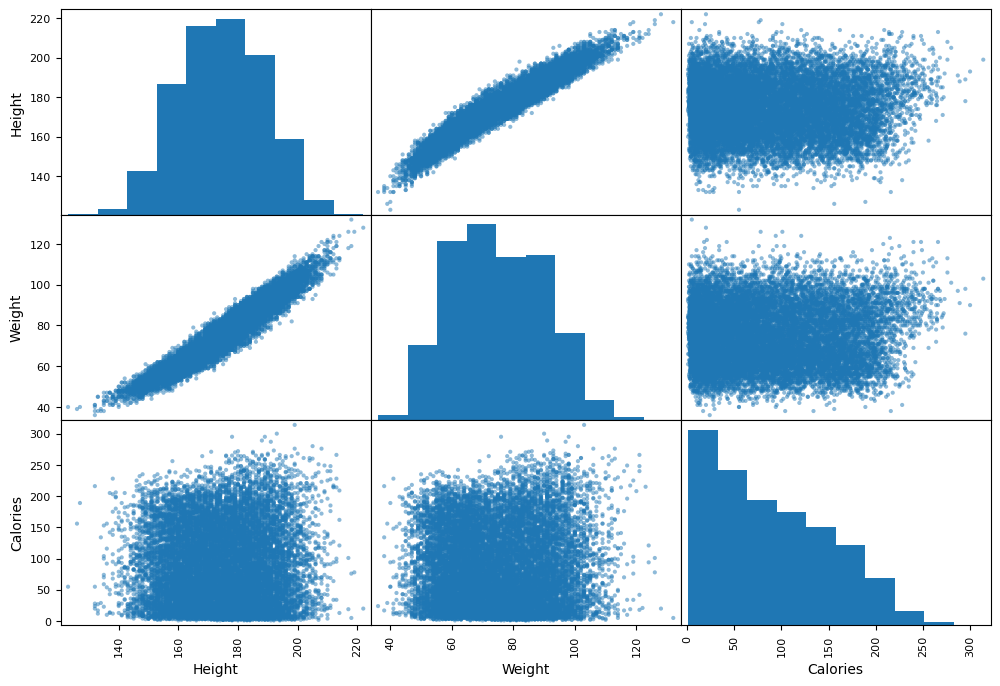

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["Height", "Weight", "Calories"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

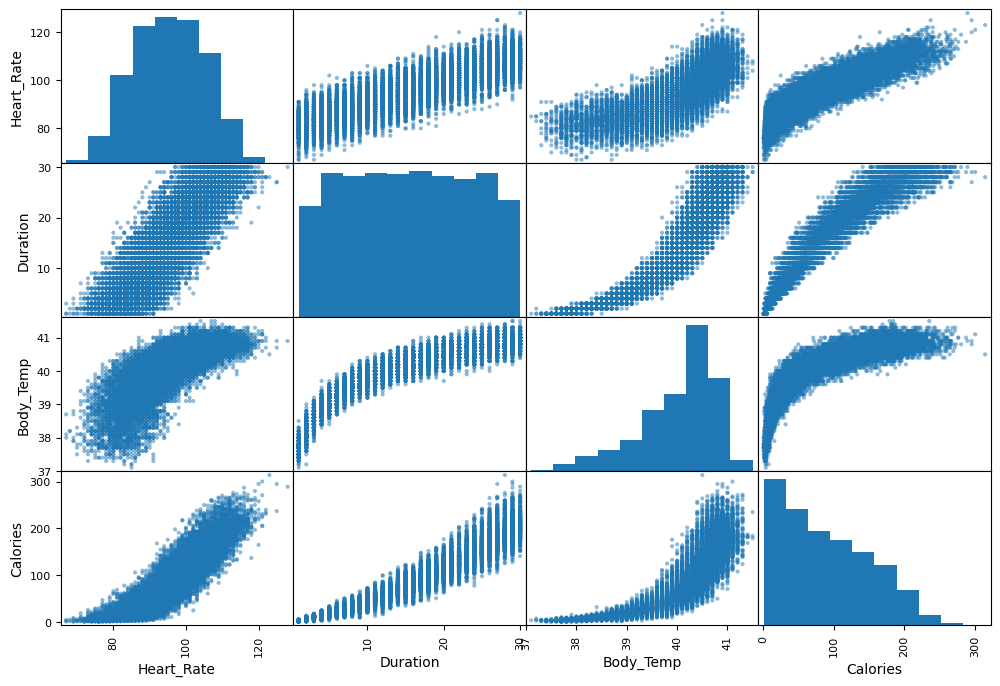

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["Heart_Rate", "Duration", "Body_Temp", "Calories"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

As we know that regression model made specifically for numerical prediction and 'male' and 'female' are string or object here so we need to assign them some interger value so that we can work out with them in the later mode training and testing part

In [27]:
df.replace({"Gender": {'male': 1, 'female': 0}}, inplace=True)

In [28]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


Separating Out Features and Target Variable

In [29]:
x = df.drop(columns=['User_ID', 'Calories'], axis = 1)
y = df['Calories']

In [30]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [31]:
y


0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [33]:
type(x_train)

pandas.core.frame.DataFrame

Model Training

I will train and then test 3 Regression based model I have known so far:
1. Linear Regression
2. Random Forest Regressor
3. XG Boost Regressor

1. Linear Regression

In [34]:
#Loading Mode
model1 = LinearRegression()

#Fitting data in the model
model1.fit(x_train, y_train) 

LinearRegression()

Model1 Testing

In [35]:
# Make predictions on the test set
y_pred1 = model1.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error(Linear Regression): {mse}")
print(f"Mean Absolute Error(Linear Regression): {mae}")
print(f"R^2 Score(Linear Regression): {r2}")


Mean Squared Error(Linear Regression): 132.8032281687623
Mean Absolute Error(Linear Regression): 8.430720673452582
R^2 Score(Linear Regression): 0.9668689931601433


2. Random Forest Regressor

In [36]:
model2 = RandomForestRegressor(n_estimators=100, random_state=43)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=43)

In [37]:
# Make predictions on the test set
y_pred2 = model2.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error(RF Regressor): {mse}")
print(f"Mean Absolute Error(RF Regressor): {mae}")
print(f"R^2 Score(RF Regressor): {r2}")


Mean Squared Error(RF Regressor): 7.084832088888888
Mean Absolute Error(RF Regressor): 1.7004
R^2 Score(RF Regressor): 0.9982325157028719


3. XG Boost Regressor

In [38]:
model3 = XGBRegressor()  
model3.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
# Make predictions on the test set
y_pred3 = model3.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error(XGB Regressor): {mse}")
print(f"Mean Absolute Error(XGB Regressor) : {mae}")
print(f"R^2 Score(XGB Regressor): {r2}")


Mean Squared Error(XGB Regressor): 4.446016437973555
Mean Absolute Error(XGB Regressor) : 1.481313860853513
R^2 Score(XGB Regressor): 0.9988908326774298


Results!!!

1. Linear Regression:

Mean Squared Error(Linear Regression): 132.8032281687623

Mean Absolute Error(Linear Regression): 8.430720673452582

R^2 Score(Linear Regression): 0.9668689931601433





2. Random Forest Regressor:

Mean Squared Error(RF Regressor): 7.084832088888888

Mean Absolute Error(RF Regressor): 1.7004

R^2 Score(RF Regressor): 0.9982325157028719






3. XG Boost Regressor:

Mean Squared Error(XGB Regressor): 4.446016437973555

Mean Absolute Error(XGB Regressor) : 1.481313860853513

R^2 Score(XGB Regressor): 0.9988908326774298


We got the best values of Mean Absolute Error and R^2 score for our XG Boost Regressor Model and very close yet not the best for RF Regressor model which are far better than Linear Regression though Linear Regression Model also gave a good R^2 score.

Hence we will be using the XG boost Regressor Model as the Final Model for prediction of the Calories burnt for the given dataset.

In [40]:
Final_Model = model3

In [41]:
Final_Model.predict(x_test)

array([171.8552  , 192.30428 ,  50.908894, ..., 126.293976, 162.1676  ,
        31.046988], dtype=float32)

In [42]:
import joblib

# Assuming Final_Model is your trained model
joblib.dump(Final_Model, 'final_model.pkl')


['final_model.pkl']